In [182]:
from data_parser import Butlr32_Data
import numpy as np
from scipy import ndimage
from skimage.feature import canny, blob_log
import matplotlib.pyplot as plt

In [124]:
path = "data\\standing_9_32x32_sensor.txt"
frames = 2000
fps = 5
data_obj = Butlr32_Data(path)
length = data_obj.get_length()
data = []

for i in range(frames):
    data.append(data_obj.pop_frame())

data = np.array(data)

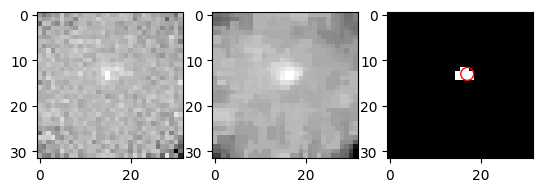

In [228]:
count = 1
frame = data[count]
frame = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))


fig = plt.figure()
plt.gray() 
ax1 = fig.add_subplot(131) 
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(frame)
new_frame = ndimage.gaussian_filter(frame, sigma=0.1)
new_frame = ndimage.median_filter(new_frame, size=4)
ax2.imshow(new_frame)
tresh = new_frame > 0.8
blobs = blob_log(tresh, max_sigma=10, threshold=0.01)
edge = canny(
    new_frame,
    sigma=1,
    low_threshold=0.09,
    high_threshold=0.26,
)
ax3.imshow(tresh)
for blob in blobs:
    y, x, area = blob
    ax3.add_patch(plt.Circle((x, y), area * np.sqrt(2), color="r", fill=False))


plt.show()

In [120]:
new_data = []
data_min = np.min(data)
data_max = np.max(data)
for i in range(len(data)):
    frame = (data[i] - data_min) / (data_max - data_min)
    new_frame = ndimage.gaussian_filter(frame, sigma=1)
    new_frame = ndimage.median_filter(new_frame, size=3)
    new_data.append(new_frame)

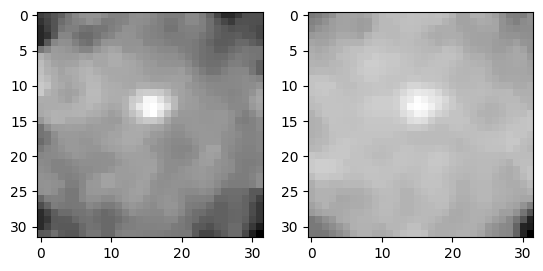

In [121]:
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(new_data[0])
ax2.imshow(new_data[1])
plt.show()